In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

numpy = lambda x : x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import pyrtools as pt
import plenoptic as po

%load_ext autoreload
%autoreload 2

In [2]:
def convert_pyrshow(pyr_coeffs, image_index):

    pyr_coeff = {}
    for k in pyr_coeffs.keys():
        pyr_coeff[k] = pyr_coeffs[k][image_index].data.detach().cpu().numpy().squeeze()

    return pyr_coeff

In [3]:
class LG(nn.Module):
    """


    """
    def __init__(self, verbose=True):
        super(LG, self).__init__()

        self.verbose = verbose

        self.L1 = po.simul.Steerable_Pyramid_Freq([256, 256], order=1, height=5)
        self.G1 = po.simul.non_linearities.local_gain_control
        
    def forward(self, image, get_list=True):

        activation1 = self.L1(image)
        
        norm1, self.direction1 = self.G1(activation1, residuals=False)

        if get_list:
            return [k for k in norm1.values()]
        else:
            return norm1

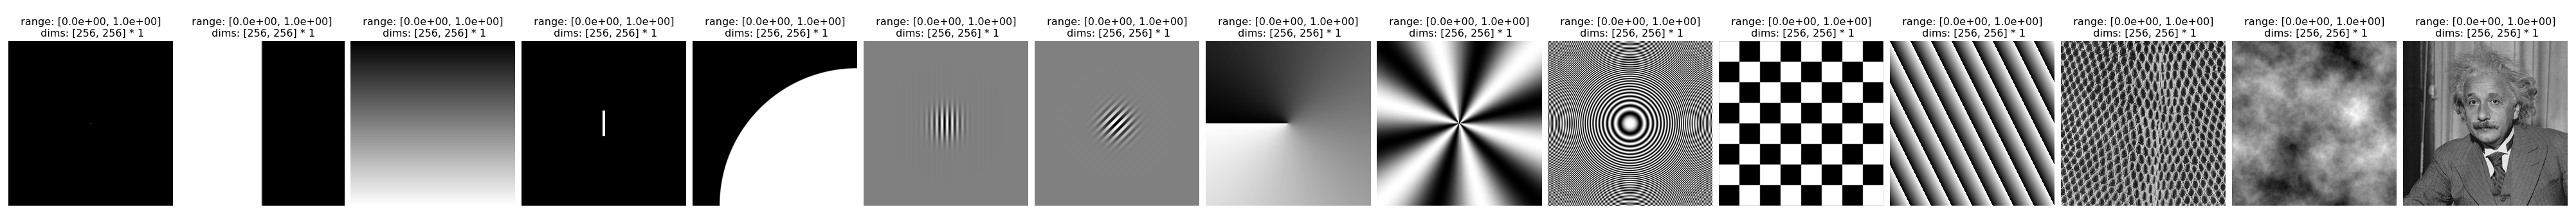

In [4]:
stimuli = po.make_basic_stimuli()
pt.imshow(numpy(stimuli));

In [5]:
lg = LG()

In [6]:
y = lg.forward(stimuli, get_list=False)

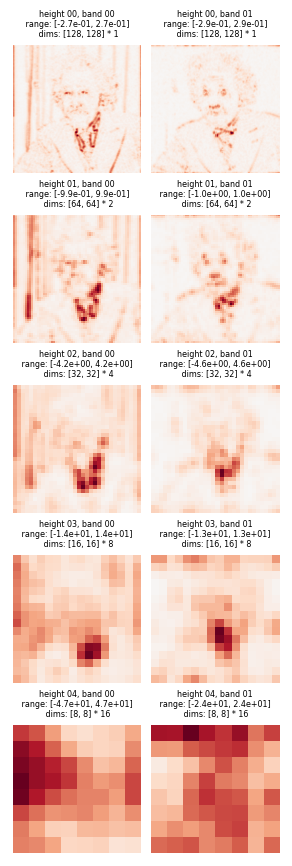

In [7]:
pt.pyrshow(convert_pyrshow(y, -1), zoom=1, vrange='indep0');

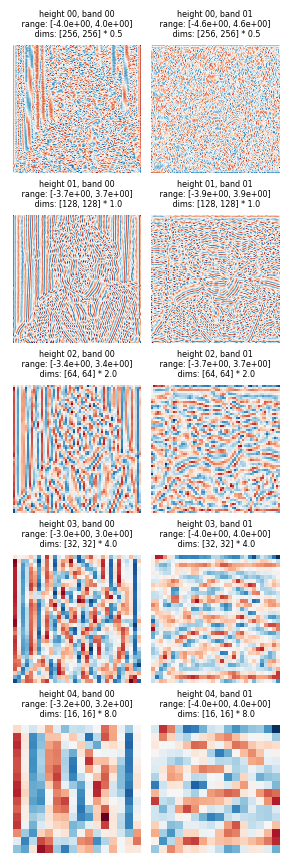

In [8]:
pt.pyrshow(convert_pyrshow(lg.direction1, -1), zoom=.5, vrange='indep0');

In [9]:
e = po.synth.Eigendistortion(stimuli[-1:], lg)

In [10]:
distortions = e.synthesize(tol=1e-4, n_steps=100)

out size torch.Size([43648, 1]) in size torch.Size([65536, 1])
implicit power method, computing the maximum distortion
0 [19.220596]
1 [9.548294]
2 [8.332649]
3 [7.949898]
4 [7.0330048]
5 [5.9207]
6 [4.8369217]
7 [3.7544327]
8 [2.7151947]
9 [1.8318939]
10 [1.1711731]
11 [0.71928406]
12 [0.43238068]
13 [0.25421143]
14 [0.1503067]
15 [0.0871582]
16 [0.05015564]
17 [0.029953]
18 [0.01664734]
19 [0.00968933]
20 [0.00579834]
21 [0.00370026]
22 [0.00189209]
23 [0.00096893]
24 [0.00050354]
25 [0.00042725]
26 [0.00066376]
27 [0.0002594]
28 [0.0001297]
29 [2.2888184e-05]
implicit power method, computing the minimum distortion
0 [11.050642]
1 [7.025036]
2 [4.34523]
3 [2.8094301]
4 [1.9715939]
5 [1.480176]
6 [1.15693]
7 [0.92392397]
8 [0.74680185]
9 [0.6087632]
10 [0.5000248]
11 [0.41396427]
12 [0.3456769]
13 [0.29127836]
14 [0.24785757]
15 [0.21298027]
16 [0.1848154]
17 [0.16192818]
18 [0.1431899]
19 [0.12773037]
20 [0.11486912]
21 [0.1040802]
22 [0.09494495]
23 [0.08714151]
24 [0.08042693]
25 [

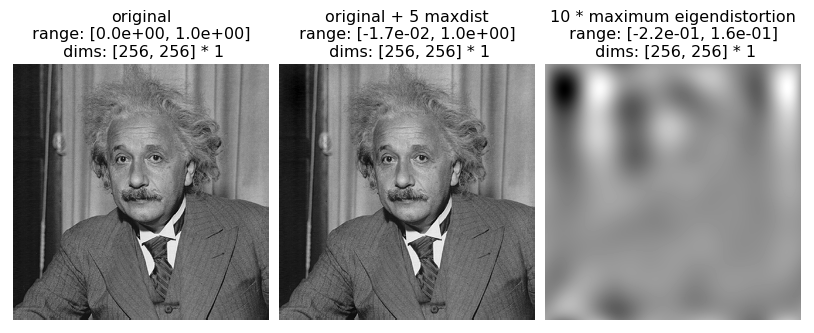

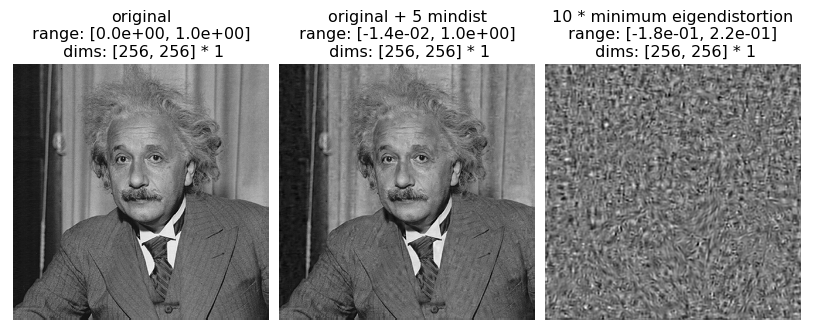

In [11]:
e.display()

In [12]:
m = po.synth.Metamer(stimuli[-1:], lg)

In [13]:
m.synthesize()

100%|██████████| 100/100 [00:22<00:00,  3.78it/s, gradient_norm=2.6153e+00, learning_rate=0.01, loss=6.9302e+01]


(tensor([[0.5493, 0.8209, 0.1450,  ..., 0.4197, 0.2640, 0.3708],
         [0.0685, 0.7889, 0.3259,  ..., 0.7429, 0.4259, 0.8735],
         [0.4369, 0.3892, 0.7028,  ..., 0.2371, 0.4733, 1.0081],
         ...,
         [0.3437, 0.4988, 0.3531,  ..., 1.0349, 0.4565, 0.8925],
         [0.1359, 0.9469, 0.6531,  ..., 0.1124, 0.7644, 0.1914],
         [0.9358, 0.4299, 0.1425,  ..., 0.0793, 0.4893, 0.7629]]),
 tensor([ 0.1448,  0.1685,  0.1569,  ..., 11.8025, 10.5702,  9.4060]))

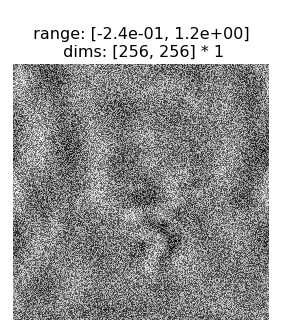

In [14]:
pt.imshow(numpy(m.matched_image));

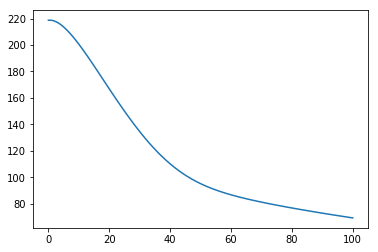

In [15]:
plt.plot(m.loss)